In [ ]:
#####  TWITTER #########


In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import math
import pandas as pd

import statsmodels as sm
import numpy as np
import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline
from matplotlib.pylab import rcParams

from scipy import stats
from scipy.special import inv_boxcox
from typing import Tuple
import lightgbm as lgb
from datetime import timedelta


In [ ]:
import yfinance as yf


data1 = yf.download('TSLA', start="2019-11-01", end="2022-10-30")
data2 = yf.download('NIO', start="2019-11-01", end="2022-10-30")
data3 = yf.download('TWTR', start="2019-11-01", end="2022-10-30")
data4 = yf.download('Meta', start="2019-11-01", end="2022-10-30")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)
df4 = pd.DataFrame(data4)



In [ ]:
df3.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-01,29.959999,30.260000,29.410000,29.620001,29.620001,22716679
2019-11-04,29.770000,30.150000,29.610001,30.049999,30.049999,20340173
2019-11-05,30.190001,30.360001,29.709999,29.809999,29.809999,16645852
2019-11-06,29.850000,29.900000,29.400000,29.540001,29.540001,15313793
2019-11-07,29.000000,29.590000,28.629999,29.049999,29.049999,22740598


In [ ]:
df3.index

DatetimeIndex(['2019-11-01', '2019-11-04', '2019-11-05', '2019-11-06',
               '2019-11-07', '2019-11-08', '2019-11-11', '2019-11-12',
               '2019-11-13', '2019-11-14',
               ...
               '2022-10-14', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21', '2022-10-24', '2022-10-25',
               '2022-10-26', '2022-10-27'],
              dtype='datetime64[ns]', name='Date', length=753, freq=None)

In [ ]:
ts3 = df3['Close']

ts3.isnull().sum()

0

In [ ]:
ts3.head()

Date
2019-11-01    29.620001
2019-11-04    30.049999
2019-11-05    29.809999
2019-11-06    29.540001
2019-11-07    29.049999
Name: Close, dtype: float64

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

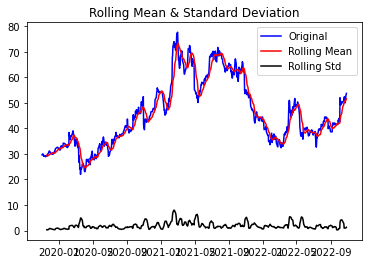

Results of Dickey-Fuller Test:
Test Statistic                  -1.942610
p-value                          0.312289
#Lags Used                       2.000000
Number of Observations Used    750.000000
Critical Value (1%)             -3.439099
Critical Value (5%)             -2.865401
Critical Value (10%)            -2.568826
dtype: float64


In [ ]:
#The observations in a stationary time series are not dependent on time.

#Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.

#When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary.


test_stationarity(ts3)


In [ ]:

ts3_log = np.log(ts3)
ts3_2ndlog = np.log(ts3_log)
ts3_3rdlog = np.log(ts3_2ndlog)
ts3_4thlog = np.log(ts3_3rdlog)
#ts3_5thlog = np.log(ts3_3rdlog)


#The p-value is obtained is greater than significance level of 0.05 and test stat -1.94 still below crtitical value in absolute term. 

#Clearly, there is no reason to reject the null hypothesis. So, the time series is in fact non-stationary.


In [ ]:
ts3_4thlog.tail()

Date
2022-10-21   -1.171026
2022-10-24   -1.151897
2022-10-25   -1.137930
2022-10-26   -1.131829
2022-10-27   -1.128147
Name: Close, dtype: float64

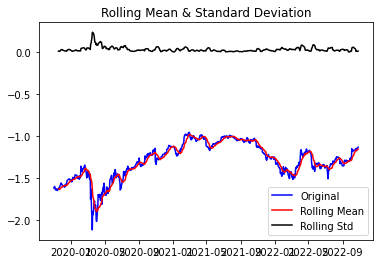

Results of Dickey-Fuller Test:
Test Statistic                  -2.219747
p-value                          0.199157
#Lags Used                      15.000000
Number of Observations Used    737.000000
Critical Value (1%)             -3.439254
Critical Value (5%)             -2.865470
Critical Value (10%)            -2.568863
dtype: float64


In [ ]:
test_stationarity(ts3_4thlog)

In [ ]:
 # The acquisition of Twitter by Elon Musk began on April 14, 2022


In [ ]:
print((ts3_4thlog== 0).sum())
print(ts3_4thlog.isnull().sum())

0
0


In [ ]:

import warnings
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


X = ts3_4thlog 

train, test = X[:'2022-04-13'], X['2022-04-14':]



def evaluate_arima_model(X, arima_order):
	# prepare training dataset

	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))


In [ ]:
###########Already run###################
###########  Dont run ####################
##########################################

import warnings 
import datetime
print(datetime.datetime.now())

p_values = [1,2,3,4,5]
q_values = [1,2,3,4]
d_values = [0,1]

warnings.filterwarnings("ignore")
evaluate_models(train, p_values, d_values, q_values)
print(datetime.datetime.now())

2022-11-13 07:46:42.563358
ARIMA(1, 0, 1) MSE=0.001
ARIMA(1, 0, 2) MSE=0.001
ARIMA(1, 0, 3) MSE=0.001
ARIMA(1, 0, 4) MSE=0.001
ARIMA(1, 1, 1) MSE=0.001
ARIMA(1, 1, 2) MSE=0.001
ARIMA(1, 1, 3) MSE=0.001
ARIMA(2, 0, 1) MSE=0.001
ARIMA(2, 0, 2) MSE=0.001
ARIMA(2, 0, 3) MSE=0.001
ARIMA(2, 0, 4) MSE=0.001
ARIMA(2, 1, 1) MSE=0.001
ARIMA(2, 1, 2) MSE=0.001
ARIMA(3, 0, 1) MSE=0.001
ARIMA(3, 0, 2) MSE=0.001
ARIMA(3, 1, 1) MSE=0.001
ARIMA(3, 1, 2) MSE=0.001
ARIMA(3, 1, 3) MSE=0.001
ARIMA(4, 0, 1) MSE=0.001
ARIMA(4, 0, 2) MSE=0.001
ARIMA(4, 0, 3) MSE=0.001
ARIMA(4, 1, 1) MSE=0.001
ARIMA(4, 1, 2) MSE=0.001
ARIMA(4, 1, 3) MSE=0.001
ARIMA(5, 0, 1) MSE=0.001
ARIMA(5, 0, 2) MSE=0.001
ARIMA(5, 0, 3) MSE=0.001
ARIMA(5, 1, 1) MSE=0.001
ARIMA(5, 1, 2) MSE=0.001
ARIMA(5, 1, 3) MSE=0.001
ARIMA(5, 1, 4) MSE=0.001
Best ARIMA(1, 0, 1) MSE=0.001
2022-11-13 08:20:54.196077


In [ ]:
#AR Model

from sklearn.metrics import mean_squared_error
from numpy.linalg import LinAlgError
import warnings
warnings.filterwarnings("ignore")

In [ ]:
history = [x for x in train]
predictions = list()
#test.reset_index()
for t in range(len(test)):
    try:
        model = ARIMA(history, order=(1,0,1))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    except (ValueError, LinAlgError):
        pass
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
rmse = mean_squared_error(test, predictions)**0.5
print('Test MSE: %.3f' % rmse)


from math import sqrt
rms = sqrt(mean_squared_error(test, predictions))

predicted=-1.227197, expected=-1.235834
predicted=-1.235669, expected=-1.189022
predicted=-1.195104, expected=-1.220048
predicted=-1.218212, expected=-1.212166
predicted=-1.213739, expected=-1.207204
predicted=-1.208862, expected=-1.182902
predicted=-1.186827, expected=-1.149860
predicted=-1.155155, expected=-1.173584
predicted=-1.172761, expected=-1.186585
predicted=-1.186175, expected=-1.180639
predicted=-1.182356, expected=-1.181769
predicted=-1.182942, expected=-1.180264
predicted=-1.181671, expected=-1.183661
predicted=-1.184539, expected=-1.181266
predicted=-1.182727, expected=-1.165381
predicted=-1.168465, expected=-1.172119
predicted=-1.172888, expected=-1.195401
predicted=-1.193979, expected=-1.204752
predicted=-1.204538, expected=-1.221047
predicted=-1.220108, expected=-1.235834
predicted=-1.234882, expected=-1.308817
predicted=-1.301227, expected=-1.377508
predicted=-1.369676, expected=-1.356942
predicted=-1.358082, expected=-1.390007
predicted=-1.386419, expected=-1.379790


In [ ]:
print(len(test))
print(len(train))
print(len(history))
print(len(predictions))

136
617
753
136


In [ ]:
from math import sqrt

a = np.exp(np.exp(np.exp(np.exp(test))))

b = np.exp(np.exp(np.exp(np.exp(predictions))))

rms = sqrt(mean_squared_error(a, b))

print('Mean Squarred Error: %.2f'% rms)

print('Mean : %.2f'%np.exp(np.exp(np.exp(np.exp(test)))).mean())


#First we check the mean value of the data set which comes out to be 42.69
#And the root mean squared error for this particular model should come to around 1.44. 
#Also you should care about is that your root mean squared should be very smaller than the mean value of test set. 
#In this case we can see the average error is gonna be roughly 1.44/42.69 *100 = 3.37% of the actual value.

Mean Squarred Error: 1.44
Mean : 42.69


In [ ]:
start = len(train)
end = len(train)+len(test)-1


prediction_model = pd.DataFrame(model_fit.predict(start=start,end=end,typ='levels'))

prediction_model.index=X.index[start:end+1]

np.exp(np.exp(np.exp(np.exp(prediction_model))))

,0
Date,
2022-04-14,45.681775
2022-04-18,45.094864
2022-04-19,48.022900
2022-04-20,46.278861
2022-04-21,46.616436
...,...
2022-10-21,52.233085
2022-10-24,50.007604
2022-10-25,51.250245


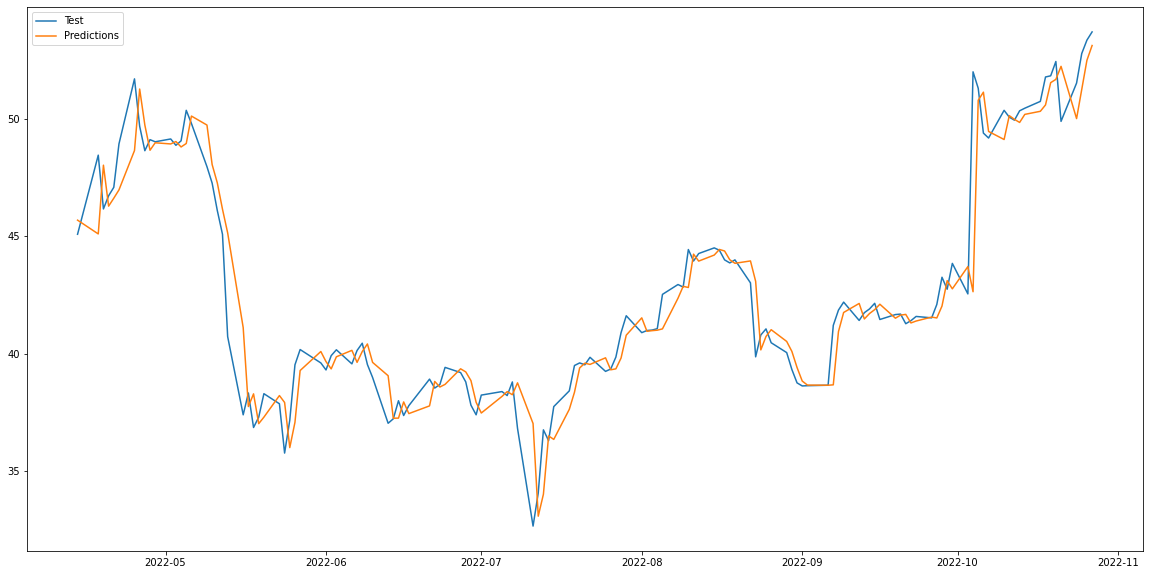

In [ ]:
plt.figure(figsize=(20,10))
#plt.plot(train, label='Training')
plt.plot(a, label='Test')
plt.plot(np.exp(np.exp(np.exp(np.exp(prediction_model)))), label='Predictions')
plt.legend(loc = 'Left corner')
plt.show()

                    0
2022-10-28  53.120979
2022-10-29  52.979002
2022-10-30  52.839007
2022-10-31  52.700959
2022-11-01  52.564823
2022-11-02  52.430565
2022-11-03  52.298153
2022-11-04  52.167555
2022-11-05  52.038737
2022-11-06  51.911671
2022-11-07  51.786326
2022-11-08  51.662671
2022-11-09  51.540679
2022-11-10  51.420321
2022-11-11  51.301569
2022-11-12  51.184396
2022-11-13  51.068776
2022-11-14  50.954683
2022-11-15  50.842092
2022-11-16  50.730977
2022-11-17  50.621314
2022-11-18  50.513080
2022-11-19  50.406251
2022-11-20  50.300804
2022-11-21  50.196718
2022-11-22  50.093969
2022-11-23  49.992536
2022-11-24  49.892400
2022-11-25  49.793537
2022-11-26  49.695930
2022-11-27  49.599557
2022-11-28  49.504400
2022-11-29  49.410439
2022-11-30  49.317655


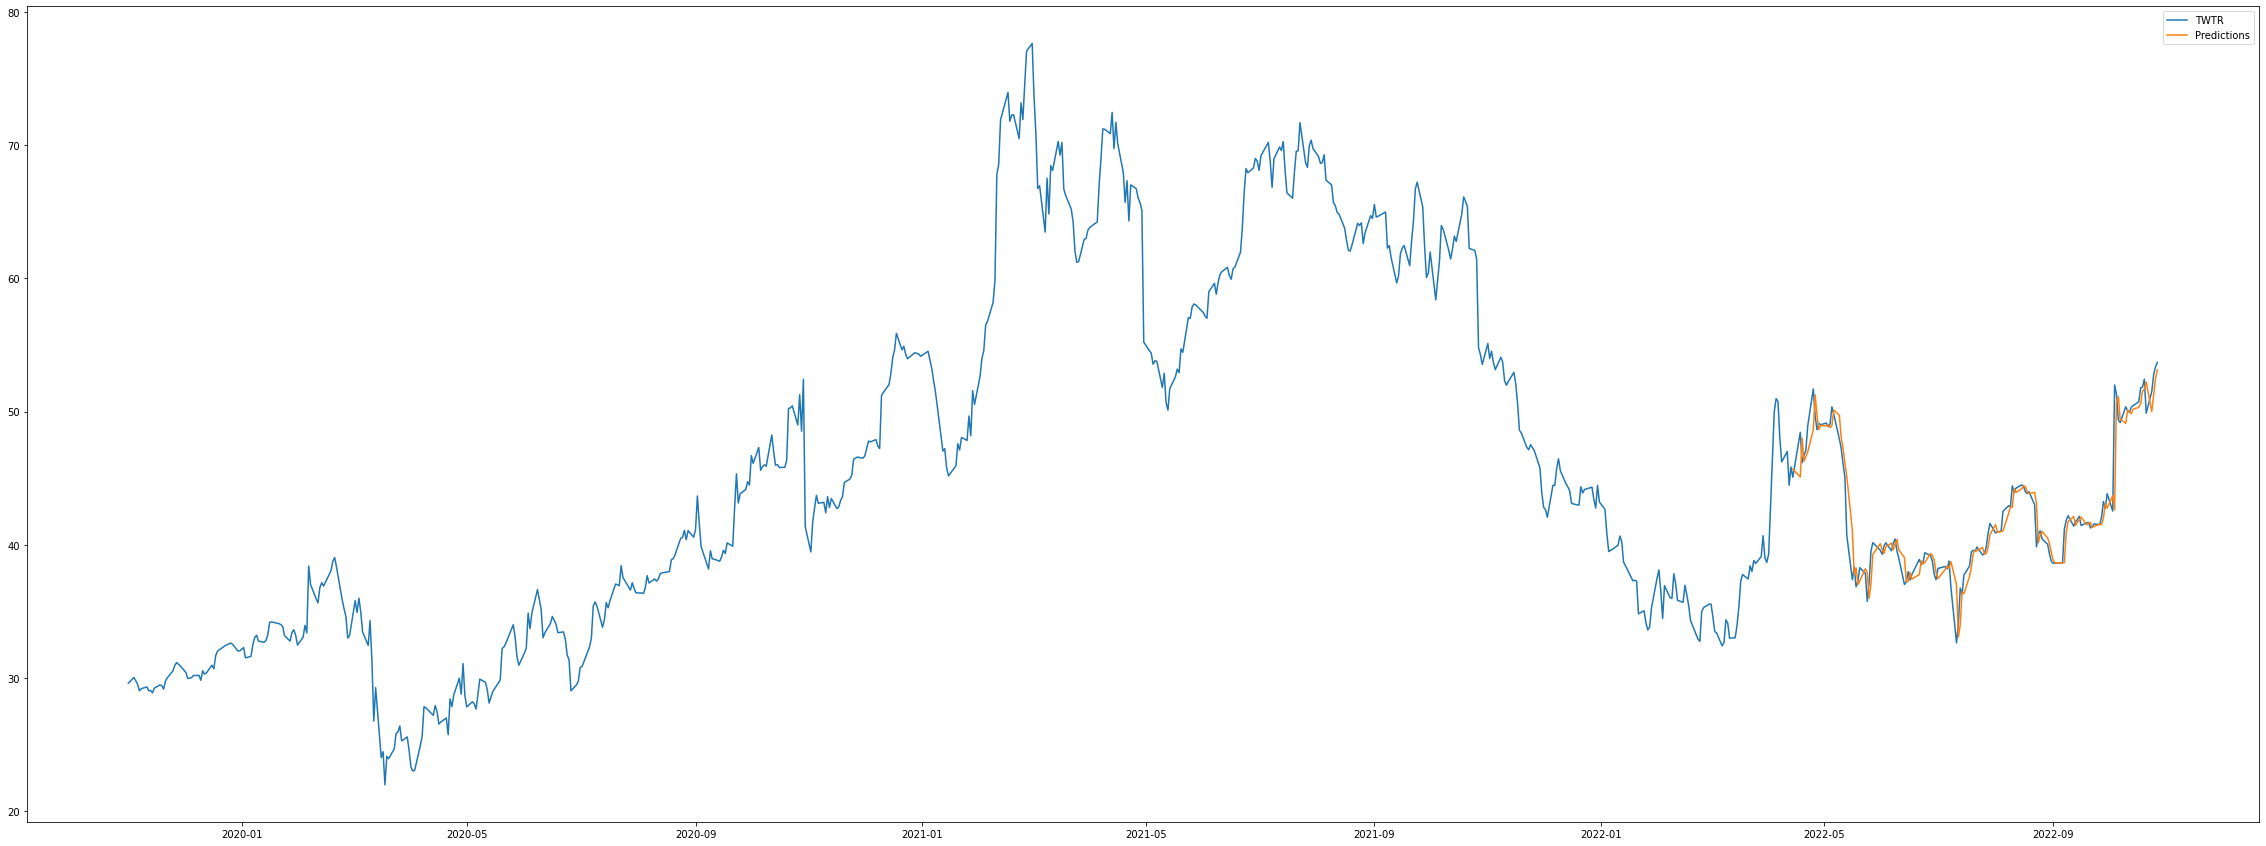

In [ ]:
#Twitter is delisted from NYSE in the future. 

#index_future_dates=pd.date_range(start='2022-10-28',end='2022-11-30')      #Wont be needed

#future_prediction_model = pd.DataFrame(model_fit.predict(start=len(X),end=len(X)+32,typ='levels'))    # Wont be needed

#future_prediction_model.index = index_future_dates            # Wont be needed 

#print(np.exp(np.exp(np.exp(np.exp(future_prediction_model)))))# Wont be needed

plt.figure(figsize=(40,15))

plt.plot(ts3,label = 'TWTR') 

plt.plot(np.exp(np.exp(np.exp(np.exp(prediction_model)))),label='Predictions')


plt.legend(loc = 'Left corner')
plt.show()
